In [1]:
import numpy as np
import pandas as pd
import math
import sys

In [2]:
# subir angulos y distancia paara regresion
df = pd.read_excel('angulos y distancias para regresion 10 casos brazo negro.xlsx')
df1 = pd.read_excel('angulo S0 para regresion brazo negro.xlsx')
print(df.head())
print(df.shape)
print(df1.head())
print(df1.shape)

   distancia   S1  S2   S3
0         10  105  65  108
1         12   92  70  110
2         14   70  75  113
3         16   65  90  120
4         18   60  95  123
(11, 4)
   angulo     S0
0      21   0.01
1      25   5.00
2      31  10.00
3      33  15.00
4      39  20.00
(36, 2)


In [3]:
# Create separate object for target variable

y1 = df.S1
y1 = y1.as_matrix()

y2 = df.S2
y2 = y2.as_matrix()

y3 = df.S3
y3 = y3.as_matrix()

y0 = df1.S0
y0 = y0.as_matrix()

# Create separate object for input features
X = df.distancia
X = X.as_matrix()
X = X.reshape(-1, 1)

# crear X paraS0
X0 = df1.angulo
X0 = X0.as_matrix()
X0 = X0.reshape(-1, 1)

In [4]:
from sklearn.tree import DecisionTreeRegressor



In [5]:
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y1)
predictions1 = regr_1.predict(X)

regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X, y2)
predictions2 = regr_2.predict(X)

regr_3 = DecisionTreeRegressor(max_depth=5)
regr_3.fit(X, y3)
predictions3 = regr_3.predict(X)

regr_0 = DecisionTreeRegressor(max_depth=6)
regr_0.fit(X0, y0)
predictions0 = regr_0.predict(X0)

In [6]:
import matplotlib.pyplot as plt
plt.plot(y1)
plt.plot(predictions1)
plt.show()


<Figure size 640x480 with 1 Axes>

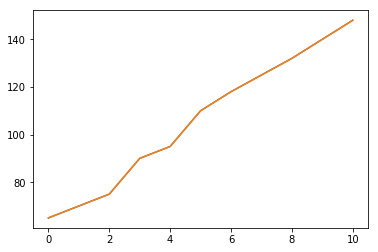

In [7]:
plt.plot(y2)
plt.plot(predictions2)
plt.show()

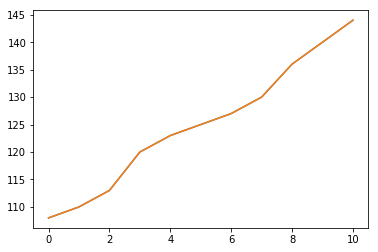

In [8]:
plt.plot(y3)
plt.plot(predictions3)
plt.show()

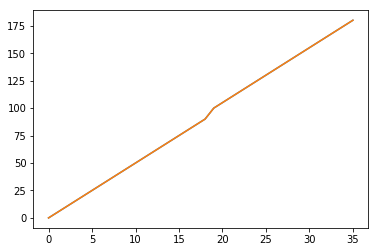

In [9]:
plt.plot(y0)
plt.plot(predictions0)
plt.show()

In [17]:
# Entrar las coordenadas para estimar los angulos de los 4 DOF
coordx = 42
coordy = 26

# Predecir angulos de los 4 DOF a partir de coordenadas X y Y
para_dist = ((coordx-40)*(coordx-40)) + coordy*coordy
distancia = np.array(math.sqrt(para_dist)).reshape(1, -1)

cos_angulo = (coordx-40)/distancia
angulo = math.degrees(math.acos(cos_angulo))

S1 = regr_1.predict(distancia)
S2 = regr_2.predict(distancia)
S3 = regr_3.predict(distancia)
S0 = regr_0.predict(angulo)

print('Angulo teorico = ',angulo)
print('Distancia = ',distancia)
print('S0 = ',S0.round(0))
print('S1 = ',S1.round(0))
print('S2 = ',S2.round(0))
print('S3 = ',S3.round(0))


Angulo teorico =  85.60129464500447
Distancia =  [[ 26.07680962]]
S0 =  [ 75.]
S1 =  [ 40.]
S2 =  [ 132.]
S3 =  [ 136.]
